In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Importing Dataset: Pima Indians Diabetes

In [2]:
pima = pd.read_csv('./diabetes.csv')
pima

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [3]:
pima.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [5]:
pima.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
pima['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

### There are no NULL values. But 0 value is there. We will replace 0 values with mean of respecetive column

In [7]:
pima[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = pima[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)
print(pima.isnull().sum())

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


In [8]:
pima['Glucose'].fillna(pima['Glucose'].mean(), inplace = True)
pima['BloodPressure'].fillna(pima['BloodPressure'].mean(), inplace = True)
pima['SkinThickness'].fillna(pima['SkinThickness'].mean(), inplace = True)
pima['Insulin'].fillna(pima['Insulin'].mean(), inplace = True)
pima['BMI'].fillna(pima['BMI'].mean(), inplace = True)

In [9]:
print(pima.isnull().sum())

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


### Results of Data Cleaning:

In [10]:
pima.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.000000,6.000000,17.00
Glucose,768.0,121.686763,30.435949,44.000,99.75000,117.000000,140.250000,199.00
BloodPressure,768.0,72.405184,12.096346,24.000,64.00000,72.202592,80.000000,122.00
SkinThickness,768.0,29.153420,8.790942,7.000,25.00000,29.153420,32.000000,99.00
Insulin,768.0,155.548223,85.021108,14.000,121.50000,155.548223,155.548223,846.00
BMI,768.0,32.457464,6.875151,18.200,27.50000,32.400000,36.600000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.372500,0.626250,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.000000,41.000000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.000000,1.000000,1.00


### Distribution of Data

array([[<AxesSubplot:title={'center':'Pregnancies'}>,
        <AxesSubplot:title={'center':'Glucose'}>,
        <AxesSubplot:title={'center':'BloodPressure'}>],
       [<AxesSubplot:title={'center':'SkinThickness'}>,
        <AxesSubplot:title={'center':'Insulin'}>,
        <AxesSubplot:title={'center':'BMI'}>],
       [<AxesSubplot:title={'center':'DiabetesPedigreeFunction'}>,
        <AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Outcome'}>]], dtype=object)

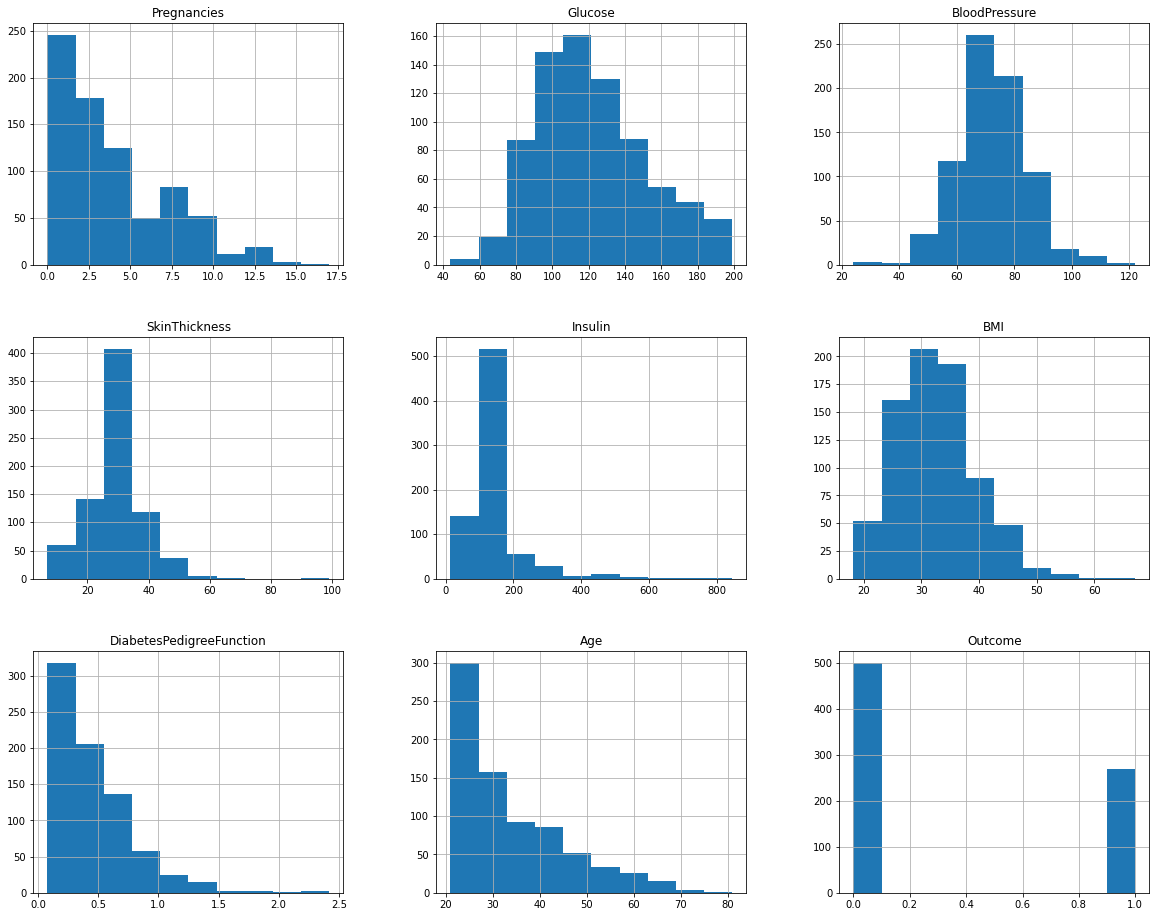

In [11]:
pima.hist(figsize=(20,16), grid=True)

In [12]:
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split

### Splitting Data into Training and Testing sets

In [13]:
X = pima.drop('Outcome', axis  = 1)
y = pima['Outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 17)

In [14]:
print(X_train.shape)
print(X_test.shape)
print(y_train.size)
print(y_test.size)

(537, 8)
(231, 8)
537
231


### Building a model using Naive Bayes Classifier

In [15]:
nbModel = GaussianNB()

In [16]:
nbModel.fit(X_train, y_train)

GaussianNB()

In [17]:
nb_y_pred = nbModel.predict(X_test)

### Evaluating the model using Confusion Matrix

In [18]:
nbConfusion = metrics.confusion_matrix(y_test, nb_y_pred)
nbConfusion

array([[124,  26],
       [ 34,  47]], dtype=int64)

<AxesSubplot:>

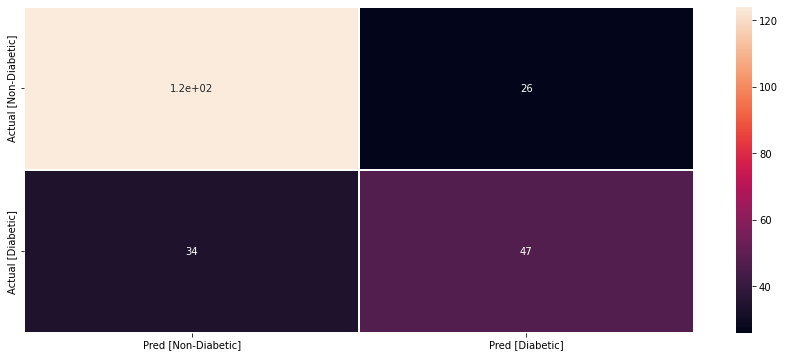

In [19]:
ylabel = ["Actual [Non-Diabetic]","Actual [Diabetic]"]
xlabel = ["Pred [Non-Diabetic]","Pred [Diabetic]"]
plt.figure(figsize=(15,6))
sns.heatmap(nbConfusion, annot=True, xticklabels = xlabel, yticklabels = ylabel, linecolor='white', linewidths=1)

In [20]:
print('Accuracy of Naive Bayes Classifier is: ', nbModel.score(X_test,y_test) * 100,'%')

Accuracy of Naive Bayes Classifier is:  74.02597402597402 %


In [21]:
print(classification_report(y_test, nb_y_pred))

              precision    recall  f1-score   support

           0       0.78      0.83      0.81       150
           1       0.64      0.58      0.61        81

    accuracy                           0.74       231
   macro avg       0.71      0.70      0.71       231
weighted avg       0.74      0.74      0.74       231



Here, 0 indicates No Diabetes, 1 indicates Diabetes

In [22]:
TP = nbConfusion[1, 1]
TN = nbConfusion[0, 0]
FP = nbConfusion[0, 1]
FN = nbConfusion[1, 0]

In [23]:
Precision = TP / (TP + FP)
Recall = TP / (TP + FN)
Specificity = TN / (TN + FP)

print("Precision: ", Precision)
print("Recall (Sensitivity): ", Recall)
print("Specificity: ", Specificity)

Precision:  0.6438356164383562
Recall (Sensitivity):  0.5802469135802469
Specificity:  0.8266666666666667


### F-measure

In [24]:
f1 = (2*Precision*Recall)/(Precision+Recall)
print("F1 Score: ", f1)

F1 Score:  0.6103896103896104
